##  Дисперсионный анализ


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
import seaborn as sns


Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**.


Почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выборке**

Чтобы выяснить это, сделаем эксперемент.

In [2]:
from numpy import random
from scipy.stats import t


def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает False'''
    n_samples = samples.shape[0]

    for i in range(n_samples):
        for j in range(i+1, n_samples):
           _, p = stats.ttest_ind(samples[:, i], samples[:, j])

           if p < alpha:
              return True

    return False


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = 0
    for _ in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result += pair_t(samples, alpha)

    pd.Series([result, repeat-result], index=[False, True]).plot.pie(ax=ax, autopct='%.0f%%')
    ax.set_ylabel('')

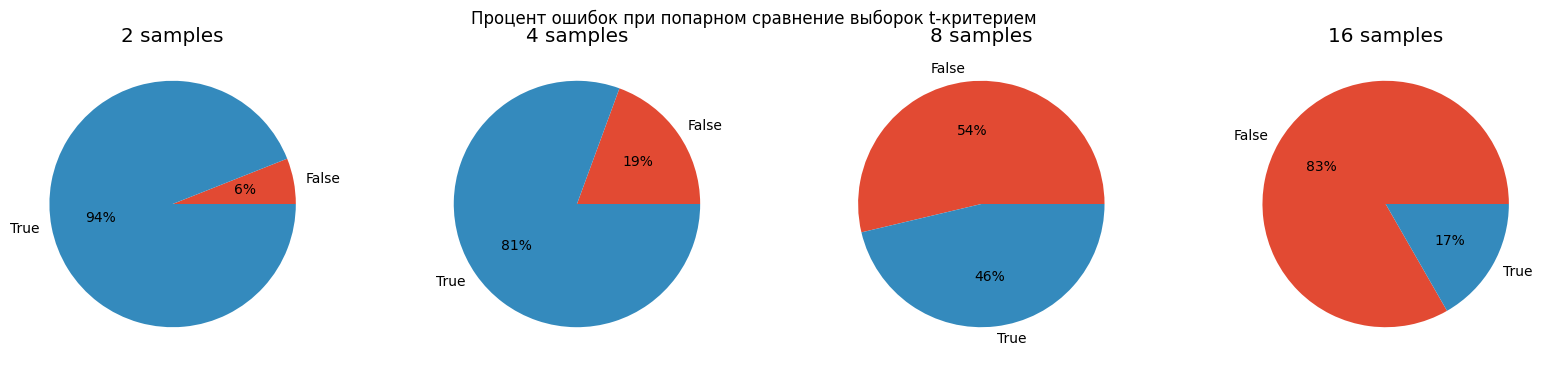

In [3]:
n_samples = [2, 4, 8, 16]
fig, axs = plt.subplots(ncols=len(n_samples), figsize=(20, 4))

fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(repeat=1000,
                n_samples=n,
                sample_size=30,
                ax=ax)
    ax.set_title(f'{n} samples')

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.


 В случаях с бОльшим кол-вом выборок мы можем применять однофакторный дисперсионный анализ.

### Задача 1.1
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам. Какие выводы можно сделать, понаблюдав за тем, как распределены данные и что показывают тесты?

In [4]:
df = pd.DataFrame([[25, 45, 30, 54],
                   [30, 55, 29, 60],
                   [28, 29, 33, 51],
                   [36, 56, 37, 62],
                   [29, 40, 27, 73]],
                   columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !(A=B=C=D)


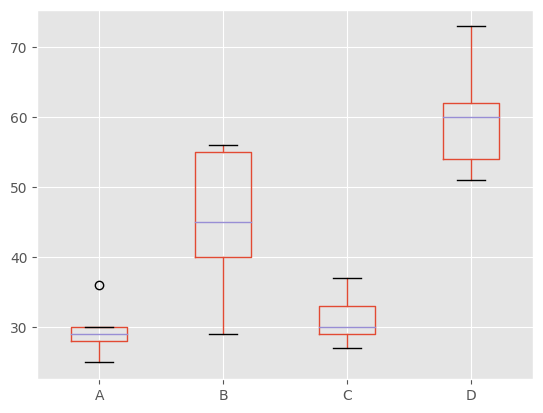

In [5]:
df.boxplot()
print('Нулевая гипотеза:', '='.join(df))
print('Альтернативная гипотеза:', f'!({"=".join(df)})')

In [6]:
f, p = stats.f_oneway(*df.values.T)
print(f'Результат: (pvalue = {p})')

Результат: (pvalue = 2.639241146210922e-05)


In [7]:
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f}")

отклоняем нулевую гипотезу
Полученное f-значение 17.492810457516338


### Задача 1.2    
    
Есть данные об измерении раковины у мидии Mytilus trossulus из пяти мест:
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные.
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.

In [8]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [9]:
data = [tillamook, newport, petersburg, magadan, tvarminne]

In [10]:
df = pd.DataFrame(data, index = ['tillamook', 'newport','petersburg','magadan','tvarminne'])
df = df.T
df

,tillamook,newport,petersburg,magadan,tvarminne
0,0.0571,0.0873,0.0974,0.1033,0.0703
1,0.0813,0.0662,0.1352,0.0915,0.1026
2,0.0831,0.0672,0.0817,0.0781,0.0956
3,0.0976,0.0819,0.1016,0.0685,0.0973
4,0.0817,0.0749,0.0968,0.0677,0.1039
5,0.0859,0.0649,0.1064,0.0697,0.1045
6,0.0735,0.0835,0.1050,0.0764,NaN
7,0.0659,0.0725,NaN,0.0689,NaN
8,0.0923,NaN,NaN,NaN,NaN
9,0.0836,NaN,NaN,NaN,NaN


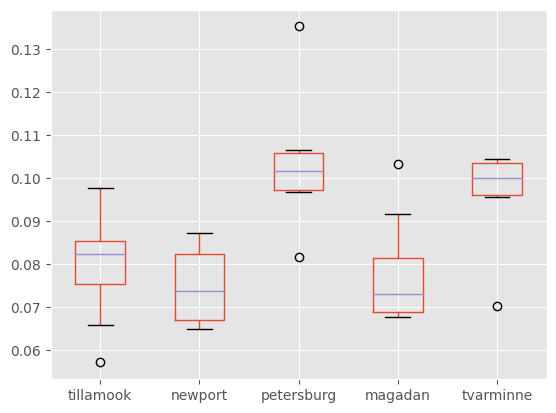

In [11]:
df.boxplot();

Для проведения дисперсионного анализа нам необходимы выборки одинаковой длины, поэтому проведем сэмплирование данных

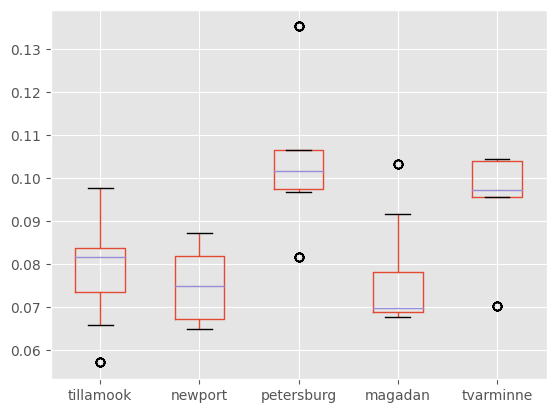

In [13]:
n = 100
df_sampled = pd.DataFrame()
for i in df:
    df_sampled[i] = df[i].dropna().sample(n, replace=True).values

df_sampled.boxplot();

In [14]:
f, p = stats.f_oneway(*df_sampled.values.T)
print(f'Результат: (pvalue = {p})')

Результат: (pvalue = 1.431150920137472e-76)


In [15]:
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f}")

отклоняем нулевую гипотезу
Полученное f-значение 131.81998877801078


Р-значение равно 0%, следовательно распределения разные, а значит размер раковины мидий зависит от места обитания

Опираясь на диаграмму можно разбить выборки на две группы: 1) tillamook, newport, magadan 2) petersburg, tvarminne

In [16]:
# сгруппируем списки и сформируем датафрейм
tnm = tillamook + newport + magadan
pt = petersburg + tvarminne
data2 = pd.DataFrame([tnm,pt], index = ['tnm','pt']).T
data2

,tnm,pt
0,0.0571,0.0974
1,0.0813,0.1352
2,0.0831,0.0817
3,0.0976,0.1016
4,0.0817,0.0968
5,0.0859,0.1064
6,0.0735,0.1050
7,0.0659,0.0703
8,0.0923,0.1026
9,0.0836,0.0956


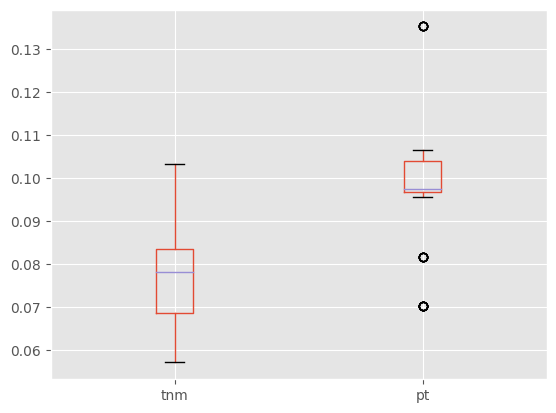

In [17]:
# сэмплируем полученные данные
n = 100
df_sampled_groups = pd.DataFrame()
for i in data2:
    df_sampled_groups[i] = data2[i].dropna().sample(n, replace=True).values

df_sampled_groups.boxplot();

In [18]:
f,p = stats.f_oneway(*df_sampled_groups.values.T)
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f}")

Результат: (pvalue = 4.63466507824087e-26)
отклоняем нулевую гипотезу
Полученное f-значение 150.16466898200855


Нулевая гипотеза отклоняется. Можно сделать аналогичный вывод, что выборки различны, размер раковин мидий зависит от места обитания.

# Задачи с самостоятельным выбором теста

### 🧠 Упражнение 1

Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

#### 🧠 Упражнение 1. Ответ

(-1.733800647210997, 0.08451003973499756)

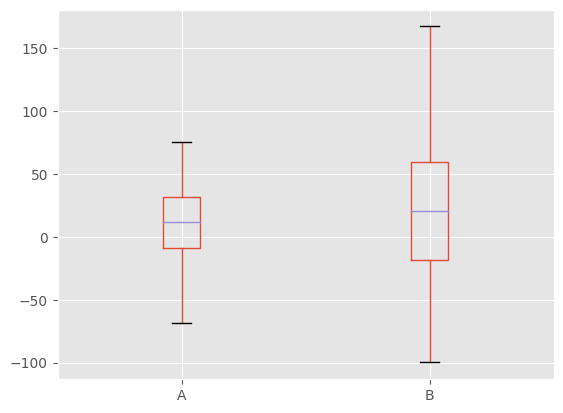

In [ ]:
df = pd.DataFrame([A,B], index = ['A','B']).T
df.boxplot()

t, p_value = stats.ttest_ind(A, B)
t, p_value

P-значение больше 5%, следовательно нулевую гипотезу мы не можем отклонить. Вывод: результаты проверки препаратов схожи

### 🧠 Упражнение 2

Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1]

# Ваш код.

#### 🧠 Упражнение 2. Ответ

Результат: (pvalue = 4.55485248155526e-05)
отклоняем нулевую гипотезу
Полученное f-значение 11.974276527331183


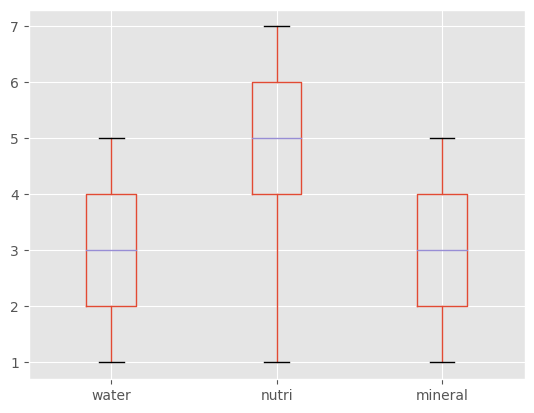

In [ ]:
data = [water, nutri,mineral]
df = pd.DataFrame(data, index = ['water', 'nutri','mineral'])
df = df.T

df.boxplot()

f,p = stats.f_oneway(*df.values.T)
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное f-значение {f}")

Р-значение меньше 5% - нулевая гипотеза отклоняется. Вывод: распределения разные, эффект от удобрения есть.

# Задача анализа A/B тестов

<img src='https://cdn1.tenchat.ru/static/vbc-gostinder/2023-05-15/compressed/27fc5ed4-1ab9-4e6c-a490-6cee5998ab8d.png' width=500>

1) A/B-тест с категориальной метерикой (метрикой пропорции)

**Значимое различие**

In [19]:
# импортируем нужные библиотеки
import pandas as pd

In [20]:
# создаем датафрейм с результатами A/B-теста
df = pd.DataFrame({
    'impressions': [5127, 5127],
    'clicks': [1145, 1250]
}, index=['var_A', 'var_B'])

df.head()

,impressions,clicks
var_A,5127,1145
var_B,5127,1250


In [21]:
# создаем таблицу сопряженности на основе результатов A/B-теста
df['no_clicks'] = df['impressions'] - df['clicks']
df = df.drop(['impressions'], axis=1)
df.head()

,clicks,no_clicks
var_A,1145,3982
var_B,1250,3877


In [22]:
from scipy import stats

# определяем значимость аб-теста
result = stats.chi2_contingency(df, correction=False)
chisq, pvalue = result[:2]
print(f'chisq = {chisq}, pvalue = {pvalue}')

chisq = 6.0061905276744785, pvalue = 0.014255771852168957


Вывод: поскольку значимость A/B теста 0.014 менее допустимого уровня значимости 0.05, то нулевую гипотезу о равенстве конверсий в группах можно отклонить, т.е. группа B - действительно генерирует статистически больше кликов, чем группа A

**Незначимое различие**

In [23]:
# создаем датафрейм с результатами A/B-теста
df = pd.DataFrame({
    'impressions': [1000, 1000],
    'clicks': [10, 15]
}, index=['var_A', 'var_B'])

df.head()

,impressions,clicks
var_A,1000,10
var_B,1000,15


In [24]:
# создаем таблицу сопряженности на основе результатов A/B-теста
df['no_clicks'] = df['impressions'] - df['clicks']
df = df.drop(['impressions'], axis=1)
df.head()

,clicks,no_clicks
var_A,10,990
var_B,15,985


In [25]:
import scipy.stats as stats

# определяем значимость аб-теста
result = stats.chi2_contingency(df, correction=False)
chisq, pvalue = result[:2]
print(f'chisq = {chisq}, pvalue = {pvalue}')

chisq = 1.0126582278481013, pvalue = 0.31426685107739916


Вывод: поскольку значимость A/B теста 0.314 больше допустимого уровня значимости 0.05, то нулевую гипотезу о равенстве конверсий в группах мы не можем отклонить, т.е. группы A и B генерируют статистически одинаковое количество кликов.

2) A/B - тест с числовой метрикой

In [26]:
# создаем датафрейм на основе словаря
df = pd.DataFrame({
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Conversion_A': [0.15, 0.12, 0.18, 0.19, 0.17, 0.13, 0.14, 0.23, 0.11, 0.15],
    'Conversion_B': [0.19, 0.20, 0.18, 0.22, 0.19, 0.17, 0.18, 0.20, 0.17, 0.22]
})

df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


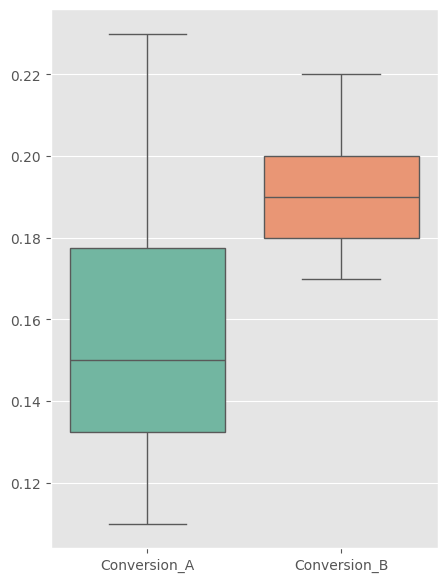

In [27]:
# визуализируем наличие различий в группах аб-теста
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 7))
ax = sns.boxplot(data=df[['Conversion_A', 'Conversion_B']], palette="Set2")


In [28]:
# считаем значимость различий по аб-тесту
t_stat, p_val = stats.ttest_ind(df['Conversion_B'], df['Conversion_A'])
print(f't test = {t_stat}, pvalue = {p_val}')

t test = 2.7321154763851614, pvalue = 0.013684259842725968


Вывод: поскольку значимость A/B теста 0.013 менее допустимого уровня значимости 0.05, то нулевую гипотезу о равенстве конверсий в группах можно отклонить, т.е. группа B действительно генерирует статистически больше покупателей, чем группа A.

# A/B - тесты
## Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>


<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

## Данные A/B тестирования

https://drive.google.com/file/d/1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB

In [29]:
!wget 'https://drive.google.com/uc?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB' -O cookie_cats.csv

--2024-06-04 07:47:44--  https://drive.google.com/uc?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB
Resolving drive.google.com (drive.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB [following]
--2024-06-04 07:47:44--  https://drive.usercontent.google.com/download?id=1bFIweB07DvbHKwqzLdanH1bUC1m2ZXyB
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2797487 (2.7M) [application/octet-stream]
Saving to: ‘cookie_cats.csv’

cookie_cats.csv     100%[===================>]   2.67M  --.-KB/s    in 0.06s   

2024-06-04 07:47:46 (46.8 MB/s

In [30]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [31]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [32]:
import numpy as np

N = 40000

np.random.seed(1)
tmp = pd.DataFrame()
for i, v in enumerate(['30', '40']):
    v = data[data.version == f'gate_{v}'].sample(N, replace=False)
    tmp = pd.concat([tmp, v])

data = tmp.reset_index(drop=True)
data.groupby('version').version.count()

version
gate_30    40000
gate_40    40000
Name: version, dtype: int64

In [33]:
data.groupby('version').sum()[['sum_gamerounds', 'retention_1', 'retention_7']]

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,2098968,17809,7574
gate_40,2052115,17646,7277


In [34]:
data.groupby('version').mean()[['sum_gamerounds', 'retention_1', 'retention_7']]

,sum_gamerounds,retention_1,retention_7
version,,,
gate_30,52.474200,0.445225,0.189350
gate_40,51.302875,0.441150,0.181925


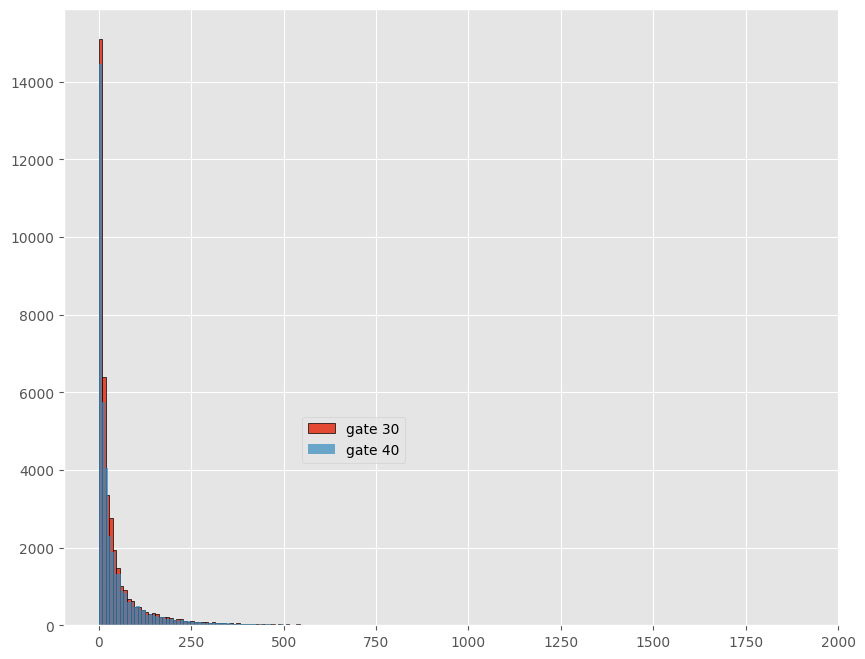

In [35]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 2000].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 2000].index)


bins = 200
plt.figure(figsize=(10, 8))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

На представленной диаграмме можно увидеть повышенное количество игроков с воротами на 30 уровне, которые прошли от 30 до 40 уровней. При этом тех кто прошел от 40 уровней и больше примерно одинаковое количество в обоих распределениях.

In [36]:
# Проверим гипотезу о том, что наибольший численный перевес игроков с воротами на 30 уровне достигается в промежутке между 30 и 40 раундами:
data[(data.sum_gamerounds > 30) & (data.sum_gamerounds < 40)].groupby('version').count()['sum_gamerounds']

version
gate_30    2495
gate_40    2117
Name: sum_gamerounds, dtype: int64

Перевес значительный. Можно предположить, что увеличение количества игроков после 30 раунда было спровоцировано воротами, что подогрело интерес к игре

In [37]:
# Проверим количество игроков, сыгравших от 40 до 50 раундов.
data[(data.sum_gamerounds > 40) & (data.sum_gamerounds < 50)].groupby('version').count()['sum_gamerounds']

version
gate_30    1755
gate_40    1549
Name: sum_gamerounds, dtype: int64

По аналогии выборки игроков с воротами на 30 уровне, можно было бы ожидать всплеск количества игроков с воротами на 40 уровне, сыгравших больше 40 уровней, но ситуация обратная, несмотря на ожидание, количество игроков существенно меньше чем в соседней выборке.


In [38]:
# Проверим количество игроков, сыгравших больше 50 раундов.
data[data.sum_gamerounds > 50].groupby('version').count()['sum_gamerounds']

version
gate_30     9918
gate_40    10232
Name: sum_gamerounds, dtype: int64

количество игроков практически одинаково

Исходя из полученных результатов можно сделать вывод, что  ворота на 30 уровне более выгодны, поскольку позволяют подогреть интерес у игроков и соответственно помогают задержать игрока подольше. В обоих выборках интерес после 40 уровня начинает спадать, что нивелирует эффект от ворот на 40 уровне. Эффект от ворот на 30 уровне напротив ощутимый, поскольку интерес у игроков к 30 уровню еще не пропал

### 🧠 Упражнение 3


Посчитайте статистику `chi2_contingency` на частотах по `retention_7`.

Сделайте выводы.

#### 🧠 Упражнение 3. Ответ

In [ ]:
ret_7 = data.groupby('version').agg(['sum', 'count'])['retention_7']
ret_7['ret7=False'] = ret_7['count'] - ret_7['sum']

ret_7.rename(columns={'sum': 'ret7=True'}, inplace=True)
ret_7.drop(columns=['count'], inplace=True)
ret_7

,ret7=True,ret7=False
version,,
gate_30,7574,32426
gate_40,7277,32723


In [ ]:
# определяем значимость аб-теста
result = stats.chi2_contingency(ret_7)
chisq, pvalue = result[:2]
print(f'chisq = {chisq}, pvalue = {pvalue}')

chisq = 7.244525694501519, pvalue = 0.007111749790032796


# Покемоны и AB-тестирование
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

https://drive.google.com/file/d/1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF

In [39]:
!wget 'https://drive.google.com/uc?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF' -O pokemon.csv

--2024-06-04 07:48:00--  https://drive.google.com/uc?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF
Resolving drive.google.com (drive.google.com)... 74.125.195.138, 74.125.195.101, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF [following]
--2024-06-04 07:48:01--  https://drive.usercontent.google.com/download?id=1T1P6z4y0i455y4nXDuLjZy-j7iDXXhpF
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39662 (39K) [application/octet-stream]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>]  38.73K  --.-KB/s    in 0s      

2024-06-04 07:48:01 (111 MB/s) - ‘pok

In [40]:
pokemon = pd.read_csv('pokemon.csv')  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


## 🧠 Упражнение 4


### Задание 4.1
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
# Ваш код.

#### 🧠 Упражнение 4.1. Ответ


In [41]:
print(pokemon.shape)

eq_class = ['Grass', 'Rock']

# Удаляем строки, где есть покемоны, которые относятся к обоим классам
df = pokemon[~((pokemon['Class 1'].isin(eq_class)) & (pokemon['Class 2'].isin(eq_class)))]

print(df.shape)

(800, 11)
(798, 11)


In [42]:
# Создаем датафрейм только с классами Grass и Rock и их силой атаки
conditions = [df['Class 1'].isin(eq_class), df['Class 2'].isin(eq_class)]
values = [df['Class 1'], df['Class 2']]
df['Class'] = np.select(conditions, values);

df = df[df['Class'].isin(eq_class)][['Class', 'Attack']]
print(df.shape)
df.head()

(149, 2)


<ipython-input-42-61c7efca830b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = np.select(conditions, values);


,Class,Attack
0,Grass,49
1,Grass,62
2,Grass,82
3,Grass,100
48,Grass,50


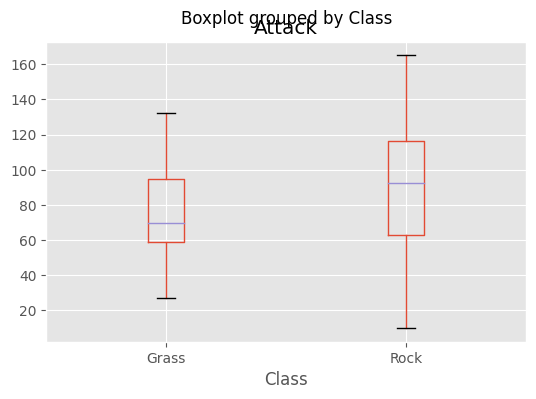

In [43]:
# Визуализируем
df.boxplot('Attack', by='Class', figsize=(6, 4));

In [44]:
# Проверяем гипотезы:
# H0 - Сила атаки покемонов одинакова
# H1 - Сила атаки покемонов отличается
statistic, pvalue =  stats.ttest_ind(df[df['Class'] == 'Grass']['Attack'], df[df['Class'] == 'Rock']['Attack'])
if pvalue < 0.05:
    print(f'Значение pvalue = {pvalue.round(4)}. На 0.05 уровене значимости мы отвергаем нулевую гипотезу и принимаем H1. ')
else:
    print(f'Значение pvalue = {pvalue}. На 0.05 уровене значимости мы принимаем нулевую гипотезу.')

Значение pvalue = 0.0003. На 0.05 уровене значимости мы отвергаем нулевую гипотезу и принимаем H1. 


In [ ]:
# На основании полученных данных видно,
# что покемоны в классе Grass не имеют более сильную обычную атаку, чем у покемонов в классе rock,
# т.е. подозрения профессора Оука безосновательны

### Задание 4.2

Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Ваш код.

#### 🧠 Упражнение 4.2. Ответ


In [45]:
print(pokemon.shape)

eq_class = ['Water', 'Normal']

# Удаляем строки, где есть покемоны, которые относятся к обоим классам
df = pokemon[~((pokemon['Class 1'].isin(eq_class)) & (pokemon['Class 2'].isin(eq_class)))]

print(df.shape)

(800, 11)
(799, 11)


In [46]:
# Создаем датафрейм только с классами Grass и Rock и их силой атаки
conditions = [df['Class 1'].isin(eq_class), df['Class 2'].isin(eq_class)]
values = [df['Class 1'], df['Class 2']]
df['Class'] = np.select(conditions, values);

df = df[df['Class'].isin(eq_class)][['Class', 'Speed']]
print(df.shape)
df.head()

(226, 2)


<ipython-input-46-acbb52c18053>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = np.select(conditions, values);


,Class,Speed
9,Water,43
10,Water,58
11,Water,78
12,Water,78
20,Normal,56


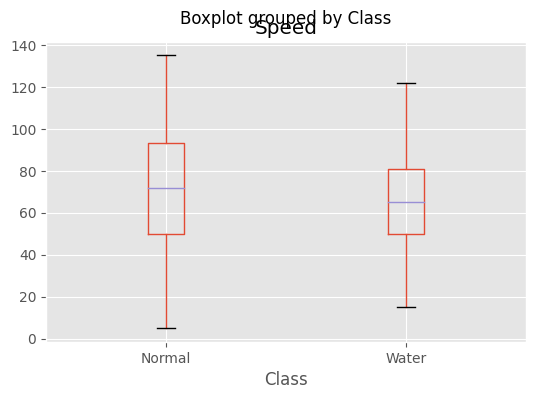

In [47]:
# Визуализируем
df.boxplot('Speed', by='Class', figsize=(6, 4));

In [48]:
# Проверяем гипотезы:
# H0 - Сила атаки покемонов одинакова
# H1 - Сила атаки покемонов отличается
statistic, pvalue =  stats.ttest_ind(df[df['Class'] == 'Normal']['Speed'], df[df['Class'] == 'Water']['Speed'])
if pvalue < 0.05:
    print(f'Значение pvalue = {pvalue.round(4)}. На 0.05 уровене значимости мы отвергаем нулевую гипотезу и принимаем H1. ')
else:
    print(f'Значение pvalue = {pvalue}. На 0.05 уровене значимости мы принимаем нулевую гипотезу.')

Значение pvalue = 0.0326. На 0.05 уровене значимости мы отвергаем нулевую гипотезу и принимаем H1. 


In [ ]:
# На основании полученных данных видно,
# что покемоны в классе Water не являются, в среднем, более быстрыми, чем у покемонов в классе Normal,
# т.е. подозрения профессора Оука опять безосновательны

### Задание 4.3

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [49]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [50]:
# Ваш код.

#### 🧠 Упражнение 4.3. Ответ


In [51]:
pokemon_treathed = pokemon[pokemon.Name.isin(treathed_pokemon)][['Name', 'Speed']]
pokemon_treathed

,Name,Speed
19,Mega Beedrill,145
71,Mega Alakazam,150
428,Deoxys Normal Forme,150
476,Mega Lopunny,135


In [52]:
pokemon_without_treathed = pokemon[~pokemon.Name.isin(treathed_pokemon)][['Name', 'Speed']]
pokemon_without_treathed

,Name,Speed
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Mega Venusaur,80
4,Charmander,65
...,...,...
795,Diancie,50
796,Mega Diancie,110
797,Hoopa Confined,70
798,Hoopa Unbound,80


In [53]:
data_speed = [pokemon_treathed['Speed'].values, pokemon_without_treathed['Speed'].values]
pokemon_speed_df = pd.DataFrame(data_speed, index=['Treathed speed', 'Normal speed']).T
pokemon_speed_df

,Treathed speed,Normal speed
0,145.0,45.0
1,150.0,60.0
2,150.0,80.0
3,135.0,80.0
4,NaN,65.0
...,...,...
791,NaN,50.0
792,NaN,110.0
793,NaN,70.0
794,NaN,80.0


In [54]:
n = 1000
df_sampled = pd.DataFrame()
for i in pokemon_speed_df:
    df_sampled[i] = pokemon_speed_df[i].dropna().sample(n, replace=True).values
df_sampled

,Treathed speed,Normal speed
0,150.0,60.0
1,145.0,40.0
2,145.0,50.0
3,145.0,70.0
4,145.0,40.0
...,...,...
995,150.0,15.0
996,135.0,60.0
997,150.0,90.0
998,150.0,45.0


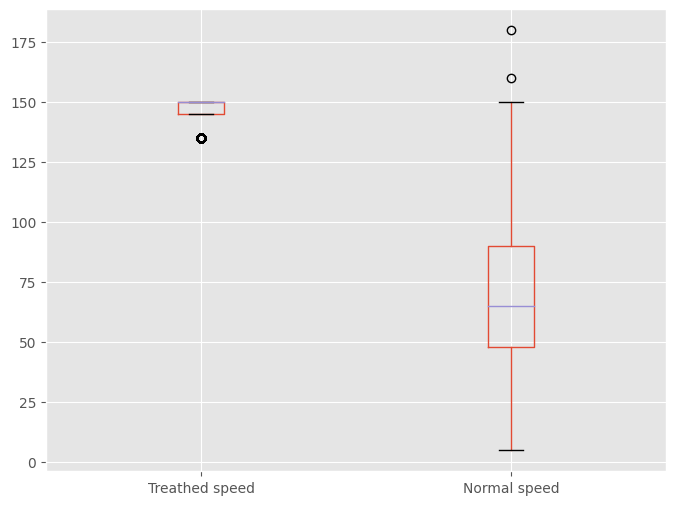

In [55]:
df_sampled.boxplot(figsize=(8, 6));

In [56]:
# Проверяем гипотезы:
statistic, pvalue =  stats.ttest_ind(df_sampled['Treathed speed'],df_sampled['Normal speed'])
if pvalue < 0.05:
    print(f'Значение pvalue = {pvalue.round(4)}. На 0.05 уровене значимости мы отвергаем нулевую гипотезу и принимаем H1. ')
else:
    print(f'Значение pvalue = {pvalue}. На 0.05 уровене значимости мы принимаем нулевую гипотезу.')

Значение pvalue = 0.0. На 0.05 уровене значимости мы отвергаем нулевую гипотезу и принимаем H1. 


In [ ]:
# распределения статистически значимо различаются
# покемоны с сывороткой имеют более высокую среднюю скорость по сравнению с покемонами без сыворотки

### Задание 4.4

Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
# Ваш код.

#### 🧠 Упражнение 4.4. Ответ


In [57]:
pokemon_legend = pokemon[pokemon['Legendary'] == True].copy()
pokemon_legend['HpAtDe'] = pokemon_legend['HP'] + pokemon_legend['Attack'] + pokemon_legend['Defense']
pokemon_legend = pokemon_legend[['Name', 'HpAtDe']]

pokemon_regular = pokemon[pokemon['Legendary'] == False].copy()
pokemon_regular['HpAtDe'] = pokemon_regular['HP'] + pokemon_regular['Attack'] + pokemon_regular['Defense']
pokemon_regular = pokemon_regular[['Name', 'HpAtDe']]

In [58]:
t,p = stats.ttest_ind(pokemon_regular['HpAtDe'], pokemon_legend['HpAtDe'])
print(f'Результат: (pvalue = {p})')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

print(f"Полученное t-значение {t}")

Результат: (pvalue = 7.970942205722087e-29)
отклоняем нулевую гипотезу
Полученное t-значение -11.591852366462316


In [ ]:
# распределения статистически значимо различаются
#  легендарные покемоны имеют более высокую сумму характеристик по сравнению с обычными покемонами